In [1]:
import sys
#!{sys.executable} -m pip install sklearn
import numpy as np
import math
from matplotlib import pyplot as plt
import matplotlib
import random
import os
from matplotlib import animation
from mpl_toolkits.mplot3d.art3d import Poly3DCollection
from scipy import spatial
from IPython.display import HTML
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import (RBF, Matern, RationalQuadratic, ExpSineSquared, DotProduct, ConstantKernel)

import importlib
import scripts.theodolite_function as tfu
import scripts.theodolite_utils as tfuu
tfu = importlib.reload(tfu)
from scipy.interpolate import splprep, splev
from scipy import interpolate
import seaborn as sns
from matplotlib.colors import BoundaryNorm
from matplotlib.ticker import MaxNLocator
from scipy.spatial.transform import Rotation as R
import scripts.gp_prediction_utils as GPf
GPf = importlib.reload(GPf)
import GPy

Failed to load Python extension for LZ4 support. LZ4 compression will not be available.


In [2]:
# Read rosbag of grand axe and show the trajectory
ttfu = importlib.reload(tfuu)

#file_name = './data/total_station/20220224/20220224_theodolite_reference_prisms.txt'
#file_name = './data/total_station/20220307/theodolite_reference_prisms.txt'
#file_name = './data/total_station/20220312/theodolite_reference_prisms.txt'
#file_name = './data/total_station/20220314/theodolite_reference_prisms.txt'
#file_name = './data/total_station/20220316/theodolite_reference_prisms.txt'
#file_name = './data/total_station/20220331-1/theodolite_reference_prisms.txt'
#file_name = './data/total_station/20220331-2/theodolite_reference_prisms.txt'

#trimble_1, trimble_2, trimble_3, T_1_grand, T_2_grand, T_3_grand = tfu.read_marker_file(file_name, 1)

#file = "/home/norlab/Data/IROS_2022/20220224_TS/2022-02-24-15-34-38.bag"
#file = "/home/norlab/Data/IROS_2022/20220307_TS/2022-03-07-19-20-06.bag"
#file = "/home/norlab/Data/IROS_2022/20220312_TS/2022-03-12-09-45-12.bag"
#file = "/home/norlab/Data/IROS_2022/20220314_TS/2022-03-14-10-47-49.bag"
#file = "/home/norlab/Data/IROS_2022/20220316_TS/2022-03-16-19-02-42.bag"
#file = "/home/norlab/Data/IROS_2022/20220331_TS/2022-03-31-10-22-52.bag"  # Tree experiments
#file = "/home/norlab/Data/IROS_2022/20220331_TS/2022-03-31-11-20-05.bag"
file = "/home/norlab/Data/IROS_2022/20220505_TS/cones1_2022-05-05-19-25-54.bag"
#file = "/home/norlab/Data/IROS_2022/20220523_TS/constrained_2022-05-23-18-56-16.bag"
#file = "/home/norlab/Data/IROS_2022/20220523_TS/cones_filtered_2022-05-23-19-31-32.bag"
#file = "/home/norlab/Data/IROS_2022/20220523_TS/empty_filtered_2022-05-23-19-18-35.bag"

time_trimble_1_g, time_trimble_2_g, time_trimble_3_g, distance_1_g, distance_2_g, distance_3_g, azimuth_1_g, azimuth_2_g, azimuth_3_g, elevation_1_g, elevation_2_g, elevation_3_g = ttfu.read_rosbag_theodolite_without_tf_raw_data(file)
time_trimble_1, time_trimble_2, time_trimble_3, distance_1, distance_2, distance_3, azimuth_1, azimuth_2, azimuth_3, elevation_1, elevation_2, elevation_3, status_1, status_2, status_3 = ttfu.read_rosbag_theodolite_without_tf_raw_data_all(file)

Number of data for theodolites: [614 653 638]
Bad measures: 67
Number of data for theodolites: [653 659 654]
Bad measures: 67


In [18]:
tfuu = importlib.reload(tfuu)

path = "./data/raw_data/20220505_cones/raw_data/"
prefix = "GP-10-20"
P1r = np.array(tfuu.read_prediction_data_csv_file(path+prefix +"_1.csv"))
P2r = np.array(tfuu.read_prediction_data_csv_file(path+prefix +"_2.csv"))
P3r = np.array(tfuu.read_prediction_data_csv_file(path+prefix +"_3.csv"))

path = "./data/raw_data/20220505_cones/raw_data/"
tt1r, trimble_1r = tfuu.read_point_data_csv_file(path+"trimble1.csv")
tt2r, trimble_2r = tfuu.read_point_data_csv_file(path+"trimble2.csv")
tt3r, trimble_3r = tfuu.read_point_data_csv_file(path+"trimble3.csv")

path = "./data/raw_data/20220505_cones/corrected_raw_data/"
prefix = "GP-10-20"
P1c = np.array(tfuu.read_prediction_data_csv_file(path+prefix +"_1.csv"))
P2c = np.array(tfuu.read_prediction_data_csv_file(path+prefix +"_2.csv"))
P3c = np.array(tfuu.read_prediction_data_csv_file(path+prefix +"_3.csv"))

path = "./data/raw_data/"
prefix = "L-1-6"
P1cc = np.array(tfuu.read_prediction_data_resection_csv_file(path+prefix +"_1.csv"))
P2cc = np.array(tfuu.read_prediction_data_resection_csv_file(path+prefix +"_2.csv"))
P3cc = np.array(tfuu.read_prediction_data_resection_csv_file(path+prefix +"_3.csv"))

path = "./data/raw_data/"
prefix = "SGP-1000-2-6"
P1ccc = np.array(tfuu.read_prediction_data_csv_file(path+prefix +"_1.csv"))
P2ccc = np.array(tfuu.read_prediction_data_csv_file(path+prefix +"_2.csv"))
P3ccc = np.array(tfuu.read_prediction_data_csv_file(path+prefix +"_3.csv"))

path = "./data/raw_data/20220505_cones/corrected_raw_data/"
tt1c, trimble_1c = tfuu.read_point_data_csv_file(path+"trimble1.csv")
tt2c, trimble_2c = tfuu.read_point_data_csv_file(path+"trimble2.csv")
tt3c, trimble_3c = tfuu.read_point_data_csv_file(path+"trimble3.csv")

path = "./data/raw_data/20220505_cones/corrected_raw_data/L_"
tt1l, trimble_1l = tfuu.read_point_data_csv_file(path+"1.csv")
tt2l, trimble_2l = tfuu.read_point_data_csv_file(path+"2.csv")
tt3l, trimble_3l = tfuu.read_point_data_csv_file(path+"3.csv")

#path = "./data/prediction/TS/20220523_empty/"
#prefix = "nr_trimble"
#P1 = np.array(tfuu.read_prediction_data_resection_csv_file(path+prefix +"_1.csv"))
#P2 = np.array(tfuu.read_prediction_data_resection_csv_file(path+prefix +"_2.csv"))
#P3 = np.array(tfuu.read_prediction_data_resection_csv_file(path+prefix +"_3.csv"))

<IPython.core.display.Javascript object>


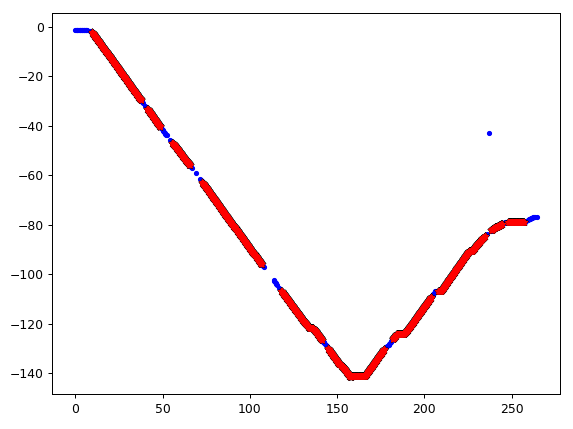

<IPython.core.display.Javascript object>


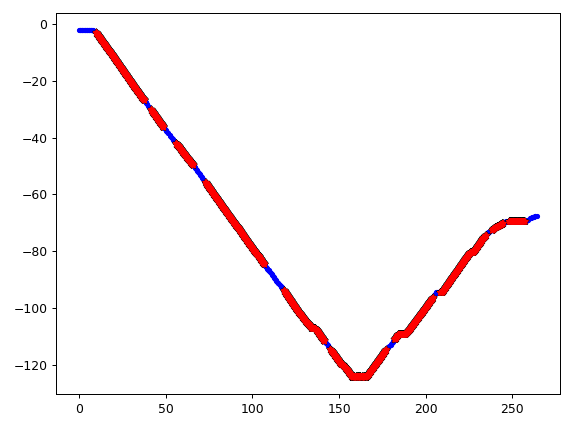

<IPython.core.display.Javascript object>


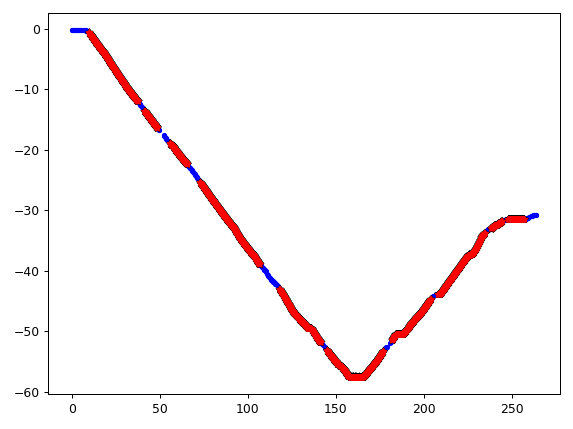

In [20]:
%matplotlib notebook
offset_timestamp = tt1c[0]

axis_c = 0

fig, ax1 = plt.subplots() 
ax1.scatter(np.array(tt1r)-offset_timestamp, np.array(trimble_1r).T[:,axis_c], color='b', marker='.', s=40)
ax1.scatter([(i[0]-offset_timestamp) for i in P1ccc], P1ccc[:,axis_c+1], color='black', marker='*', s=30)
ax1.scatter([(i[0]-offset_timestamp) for i in P1cc], P1cc[:,axis_c+1], color='r', marker='*', s=20)
plt.show()

fig, ax1 = plt.subplots() 
ax1.scatter(np.array(tt2r)-offset_timestamp, np.array(trimble_2r).T[:,axis_c], color='b', marker='.', s=40)
ax1.scatter([(i[0]-offset_timestamp) for i in P2ccc], P2ccc[:,axis_c+1], color='black', marker='*', s=30)
ax1.scatter([(i[0]-offset_timestamp) for i in P2cc], P2cc[:,axis_c+1], color='r', marker='*', s=20)
plt.show()

fig, ax1 = plt.subplots() 
ax1.scatter(np.array(tt3r)-offset_timestamp, np.array(trimble_3r).T[:,axis_c], color='b', marker='.', s=40)
ax1.scatter([(i[0]-offset_timestamp) for i in P3ccc], P3ccc[:,axis_c+1], color='black', marker='*', s=30)
ax1.scatter([(i[0]-offset_timestamp) for i in P3cc], P3cc[:,axis_c+1], color='r', marker='*', s=20)
plt.show()

In [24]:
print(len(P1c))
print(len(P1r))

dist_1 = []
dist_2 = []
dist_3 = []
for i,j in zip(P1c,P1r):
    dist_1.append(np.linalg.norm(i[0:3]-j[0:3]))
for i,j in zip(P2c,P2r):
    dist_2.append(np.linalg.norm(i[0:3]-j[0:3]))
for i,j in zip(P3c,P3r):
    dist_3.append(np.linalg.norm(i[0:3]-j[0:3]))

1016
1016


<IPython.core.display.Javascript object>


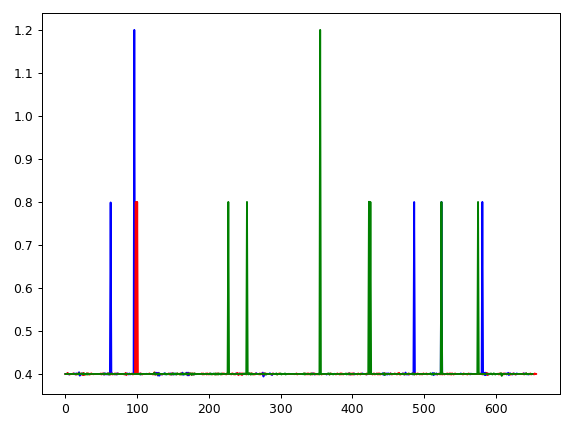

<IPython.core.display.Javascript object>


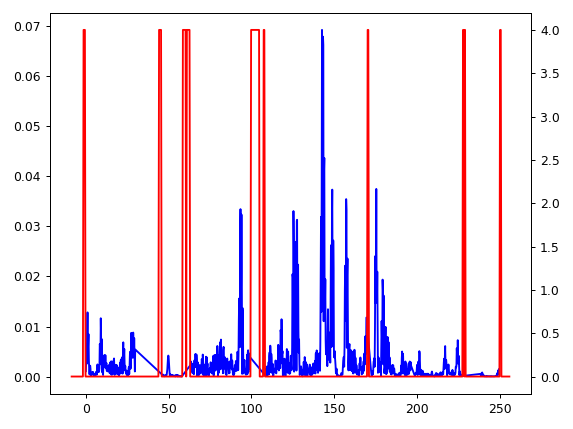

<IPython.core.display.Javascript object>


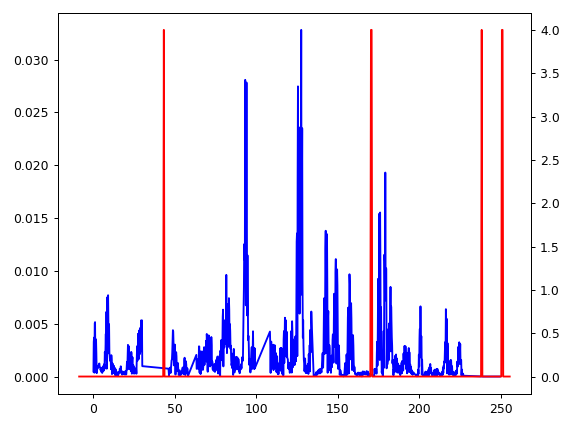

<IPython.core.display.Javascript object>


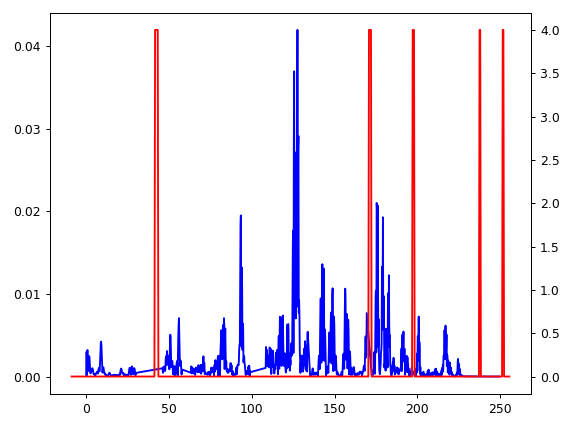

In [51]:
%matplotlib notebook
offset_timestamp = min(P1c[0,0],P2c[0,0],P3c[0,0])

fig, ax1 = plt.subplots() 
ax1.plot([(time_trimble_1[i]-time_trimble_1[i-1]) for i in range(1,len(time_trimble_1)-1)], color='b')
ax1.plot([(time_trimble_2[i]-time_trimble_2[i-1]) for i in range(1,len(time_trimble_2)-1)], color='r')
ax1.plot([(time_trimble_3[i]-time_trimble_3[i-1]) for i in range(1,len(time_trimble_3)-1)], color='g')
plt.show()


fig, ax1 = plt.subplots() 

#ax1.scatter([(i[0]-offset_timestamp) for i in P1c], P1c[:,1], color='b')
#ax1.scatter([(i[0]-offset_timestamp) for i in P1r], P1r[:,1], color='r')

ax1.plot([(i[0]-offset_timestamp) for i in P1c], dist_1, color='b')

#ax1.scatter([(i[0]-offset_timestamp) for i in P2c], P2c[:,1], color='r')
#ax1.scatter([(i[0]-offset_timestamp) for i in P3c], P3c[:,1], color='g')
#ax1.scatter([(i-offset_timestamp) for i in time_trimble_2], distance_2, color='r')
#ax1.scatter([(i-offset_timestamp) for i in time_trimble_3], distance_3, color='g')

#ax1.scatter([(i-offset_timestamp) for i in time_trimble_1], azimuth_1, color='b')
#ax1.scatter([(i-offset_timestamp) for i in time_trimble_2], azimuth_2, color='r')
#ax1.scatter([(i-offset_timestamp) for i in time_trimble_3], azimuth_3, color='g')

ax2 = ax1.twinx() 
ax2.plot([(i-offset_timestamp) for i in time_trimble_1], status_1, color='r')
#ax2.plot([(i-offset_timestamp) for i in time_trimble_2], status_2, color='r')
#ax2.plot([(i-offset_timestamp) for i in time_trimble_3], status_3, color='g')
#ax2.set_ylim(0, 4.1)
plt.show()

fig, ax1 = plt.subplots() 
ax1.plot([(i[0]-offset_timestamp) for i in P2c], dist_2, color='b')
ax2 = ax1.twinx() 
ax2.plot([(i-offset_timestamp) for i in time_trimble_2], status_2, color='r')
plt.show()

fig, ax1 = plt.subplots() 
ax1.plot([(i[0]-offset_timestamp) for i in P3c], dist_3, color='b')
ax2 = ax1.twinx() 
ax2.plot([(i-offset_timestamp) for i in time_trimble_3], status_3, color='r')
plt.show()

#plt.figure(1)
#plt.plot([(i-offset_timestamp) for i in time_trimble_1], azimuth_1, color='b')
#plt.plot([(i-offset_timestamp) for i in time_trimble_2], azimuth_2, color='r')
#plt.plot([(i-offset_timestamp) for i in time_trimble_3], azimuth_3, color='g')
#plt.figure(2)
#plt.plot([(i-offset_timestamp) for i in time_trimble_1], elevation_1, color='b')
#plt.plot([(i-offset_timestamp) for i in time_trimble_2], elevation_2, color='r')
#plt.plot([(i-offset_timestamp) for i in time_trimble_3], elevation_3, color='g')

In [ ]:
%matplotlib notebook
offset_timestamp = tt1c[0]
fig, ax1 = plt.subplots() 

#ax1.scatter(P1c[:,0], P1c[:,2], color='b')
#ax1.scatter(P1r[:,0], P1r[:,2], color='r')

#ax1.scatter(np.array(trimble_1r).T[:,0], np.array(trimble_1r).T[:,1], color='b')
#ax1.scatter(np.array(trimble_1c).T[:,0], np.array(trimble_1c).T[:,1], color='r')

ax1.scatter(np.array(tt3r)-offset_timestamp, np.array(trimble_3r).T[:,0], color='b', marker='.', s=20)
#ax1.scatter(np.array(tt1l)-offset_timestamp, np.array(trimble_1l).T[:,0], color='orange', marker='.', s=90)

#ax1.scatter(np.array(trimble_1c).T[:,0], np.array(trimble_1c).T[:,1], color='b', marker='.', s=90)
#ax1.scatter(np.array(trimble_1l).T[:,0], np.array(trimble_1l).T[:,1], color='orange', marker='.', s=90)

#ax1.scatter([(i[0]-offset_timestamp) for i in P1r], P1r[:,1], color='g', marker='*', s=10)
ax1.scatter([(i[0]-offset_timestamp) for i in P3c], P3c[:,1], color='black', marker='*', s=20)
ax1.scatter([(i[0]-offset_timestamp) for i in P3cc], P3cc[:,1], color='r', marker='*', s=20)

#ax1.plot([(i[0]-offset_timestamp) for i in P1r], P1r[:,1], color='g')
#ax1.plot([(i[0]-offset_timestamp) for i in P1c], P1c[:,1], color='black')
#ax1.plot([(i[0]-offset_timestamp) for i in P1cc], P1cc[:,1], color='r')

plt.show()
